In [1]:
from pandas.core import algorithms as algos
from pandas import Series
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import stats
import traceback
import re
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

In [2]:
train_df = pd.read_csv("../output/train_df_analyzed.csv", index_col=0)

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31880 entries, 0 to 31879
Data columns (total 48 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       31880 non-null  object 
 1   Station                    31880 non-null  int64  
 2   Latitude                   31880 non-null  float64
 3   Longitude                  31880 non-null  float64
 4   distance_frm_stn1          31880 non-null  float64
 5   distance_frm_stn2          31880 non-null  float64
 6   closest_station            31880 non-null  int64  
 7   Species                    31880 non-null  object 
 8   NumMosquitos               31880 non-null  int64  
 9   WnvPresent                 31880 non-null  int64  
 10  year                       31880 non-null  int64  
 11  month                      31880 non-null  int64  
 12  week                       31880 non-null  int64  
 13  day_of_week                31880 non-null  int

In [4]:
train_df = train_df.drop(columns=["Date"])

In [5]:

def encode (df):
    cat_columns = train_df.select_dtypes(include=["object", "category"]).columns
    print (cat_columns)
    enc_df = pd.get_dummies(df[cat_columns], drop_first=True)

    return enc_df

In [6]:
train_df["year"]=train_df.year.astype("category")
train_df = train_df.join(encode(train_df))
train_df.columns
# train_df.info()

Index(['Species', 'year', 'CodeSumDesc', 'Season', 'monthOfYear'], dtype='object')


Index(['Station', 'Latitude', 'Longitude', 'distance_frm_stn1',
       'distance_frm_stn2', 'closest_station', 'Species', 'NumMosquitos',
       'WnvPresent', 'year', 'month', 'week', 'day_of_week', 'day_of_month',
       'Tmax', 'Tmin', 'Tavg', 'Depart', 'DewPoint', 'WetBulb',
       'Relative_humidity', 'Heat', 'Cool', 'CodeSumDesc', 'PrecipTotal',
       'StnPressure', 'SeaLevel', 'ResultSpeed', 'ResultDir', 'Season',
       'monthOfYear', 'monthly_#days_per_codesum', 'weekly_#days_per_codesum',
       'Avg_Temp_Diff_1D', 'Avg_Temp_Diff_2D', 'Avg_Temp_Diff_3D',
       'Avg_Temp_Diff_4D', 'Avg_Temp_Diff_5D', 'Avg_Temp_Diff_6D',
       'Avg_Temp_Diff_7D', 'Avg_humidity_Diff_1D', 'Avg_humidity_Diff_2D',
       'Avg_humidity_Diff_3D', 'Avg_humidity_Diff_4D', 'Avg_humidity_Diff_5D',
       'Avg_humidity_Diff_6D', 'Avg_humidity_Diff_7D', 'Species_CULEX PIPIENS',
       'Species_CULEX PIPIENS/RESTUANS', 'Species_CULEX RESTUANS', 'year_2009',
       'year_2011', 'year_2013', 'CodeSumDesc_FO

In [7]:
train_df.drop(columns=['Species', 'year', 'CodeSumDesc', 'Season', 'monthOfYear'], inplace=True)
train_df.columns

Index(['Station', 'Latitude', 'Longitude', 'distance_frm_stn1',
       'distance_frm_stn2', 'closest_station', 'NumMosquitos', 'WnvPresent',
       'month', 'week', 'day_of_week', 'day_of_month', 'Tmax', 'Tmin', 'Tavg',
       'Depart', 'DewPoint', 'WetBulb', 'Relative_humidity', 'Heat', 'Cool',
       'PrecipTotal', 'StnPressure', 'SeaLevel', 'ResultSpeed', 'ResultDir',
       'monthly_#days_per_codesum', 'weekly_#days_per_codesum',
       'Avg_Temp_Diff_1D', 'Avg_Temp_Diff_2D', 'Avg_Temp_Diff_3D',
       'Avg_Temp_Diff_4D', 'Avg_Temp_Diff_5D', 'Avg_Temp_Diff_6D',
       'Avg_Temp_Diff_7D', 'Avg_humidity_Diff_1D', 'Avg_humidity_Diff_2D',
       'Avg_humidity_Diff_3D', 'Avg_humidity_Diff_4D', 'Avg_humidity_Diff_5D',
       'Avg_humidity_Diff_6D', 'Avg_humidity_Diff_7D', 'Species_CULEX PIPIENS',
       'Species_CULEX PIPIENS/RESTUANS', 'Species_CULEX RESTUANS', 'year_2009',
       'year_2011', 'year_2013', 'CodeSumDesc_FOG', 'CodeSumDesc_HAZE',
       'CodeSumDesc_MIST', 'CodeSumDesc_OT

<AxesSubplot:>

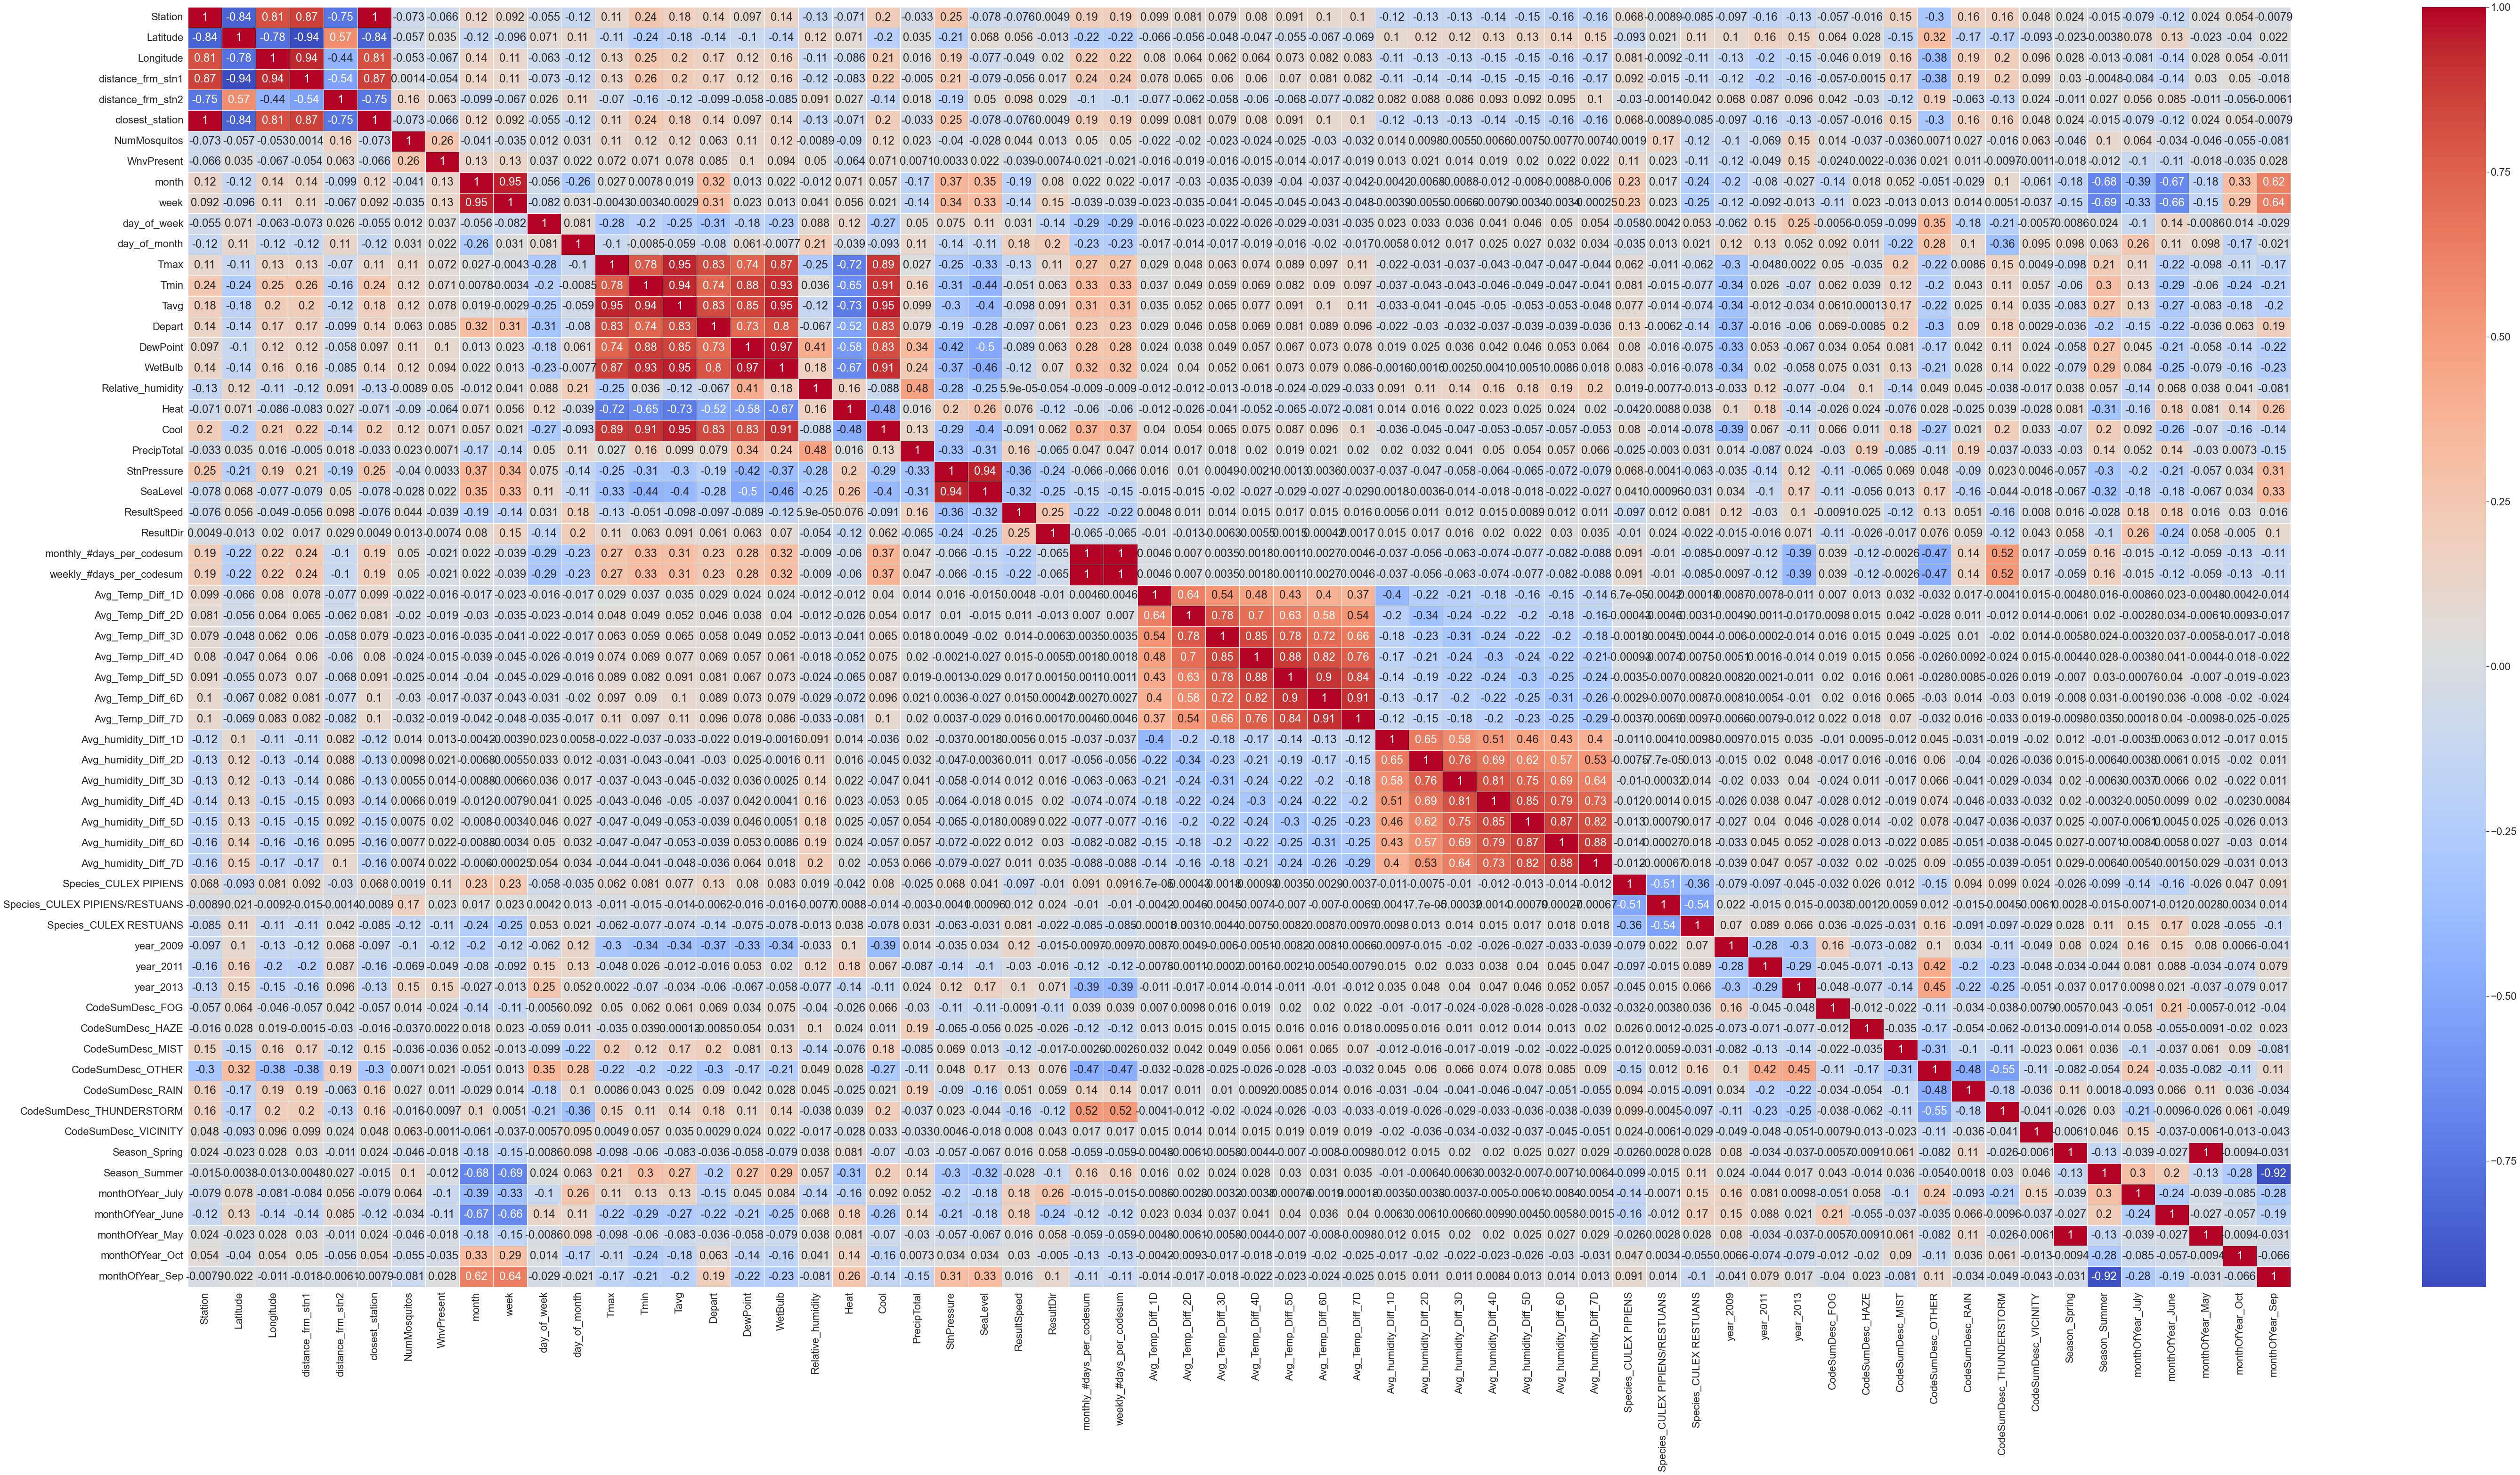

In [8]:
plt.figure(figsize=(100,50))
sns.set(font_scale=2)
sns.heatmap(train_df.corr(), linewidths=1, annot=True, cmap="coolwarm")

In [9]:
X = train_df.drop(columns=["WnvPresent"], axis=1)
y = train_df.WnvPresent

In [10]:
X_train,X_test, y_train,  y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [11]:
# check the percent of target data in test, train and original dataset.
target_y_percent = round((y.value_counts()/len(y))* 100,2)
y_train_percent = round((y_train.value_counts()/ len(y_train))*100,2)
y_test_percent = round((y_test.value_counts()/ len(y_test))*100,2)
print (f"target percent = {target_y_percent.unique()} , train target%= {y_train_percent.unique()}, test target%= {y_test_percent.unique()}")

target percent = [92.96  7.04] , train target%= [92.91  7.09], test target%= [93.09  6.91]


In [12]:
# choose a faction of data from our training dataset to handle imbalance.
X_train_7 = X_train.sample(frac=0.07)
X_test_7 = X_test.sample(frac=0.07)
y_train_7 = y_train.sample(frac=0.07)
y_test_7 = y_test.sample(frac=0.07)

In [13]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from scipy import stats
import pandas.core.algorithms as algos
from pandas import Series
import scipy.stats.stats as stats
import traceback
import re

In [14]:
#scale data

# build scaler based on training data and apply it to test data to then also scale the test data
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [15]:
max_bin = 20
force_bin = 3


# define a binning function
def mono_bin(Y, X, n=max_bin):
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X', 'Y']][df1.X.isnull()]
    notmiss = df1[['X', 'Y']][df1.X.notnull()]
    #print("justmiss", justmiss)
    #print("notmiss", notmiss)
    r = 0
    while np.abs(r) < 1:
        try:
            d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.qcut(notmiss.X, n)})
            d2 = d1.groupby('Bucket', as_index=True)
            r, p = stats.spearmanr(d2.mean().X, d2.mean().Y)
            #print("I am here 1",r, n,len(d2))
            n = n - 1

        except Exception as e:
            n = n - 1
            #print("I am here e",n)

    if len(d2) == 1:
        #print("I am second step ",r, n)
        n = force_bin
        bins = algos.quantile(notmiss.X, np.linspace(0, 1, n))
        if len(np.unique(bins)) == 2:
            bins = np.insert(bins, 0, 1)
            bins[1] = bins[1] - (bins[1] / 2)
        d1 = pd.DataFrame(
            {"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.cut(notmiss.X, np.unique(bins), include_lowest=True)})
        d2 = d1.groupby('Bucket', as_index=True)

    d3 = pd.DataFrame({}, index=[])
    d3["MIN_VALUE"] = d2.min().X
    d3["MAX_VALUE"] = d2.max().X
    d3["COUNT"] = d2.count().Y
    d3["EVENT"] = d2.sum().Y
    d3["NONEVENT"] = d2.count().Y - d2.sum().Y
    d3 = d3.reset_index(drop=True)

    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE': np.nan}, index=[0])
        d4["MAX_VALUE"] = np.nan
        #print(justmiss.count().Y)
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4, ignore_index=True)

    d3["EVENT_RATE"] = d3.EVENT / d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT / d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT / d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT / d3.sum().NONEVENT
    print(np.log(d3.DIST_EVENT / d3.DIST_NON_EVENT))
    d3["WOE"] = np.log(d3.DIST_EVENT / d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT - d3.DIST_NON_EVENT) * np.log(d3.DIST_EVENT / d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME', 'MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE',
             'DIST_EVENT', 'DIST_NON_EVENT', 'WOE', 'IV']]
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()

    return (d3)


In [16]:

def char_bin(Y, X):
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X', 'Y']][df1.X.isnull()]
    notmiss = df1[['X', 'Y']][df1.X.notnull()]
    df2 = notmiss.groupby('X', as_index=True)
    d3 = pd.DataFrame({}, index=[])
    d3["COUNT"] = df2.count().Y
    d3["MIN_VALUE"] = df2.sum().Y.index
    d3["MAX_VALUE"] = d3["MIN_VALUE"]
    d3["EVENT"] = df2.sum().Y
    d3["NONEVENT"] = df2.count().Y - df2.sum().Y

    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE': np.nan}, index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4, ignore_index=True)

    d3["EVENT_RATE"] = d3.EVENT / d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT / d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT / d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT / d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT / d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT - d3.DIST_NON_EVENT) * np.log(d3.DIST_EVENT / d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME', 'MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE',
             'DIST_EVENT', 'DIST_NON_EVENT', 'WOE', 'IV']]
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    #print("hi",d3.IV )
    d3 = d3.reset_index(drop=True)

    return (d3)


In [17]:

def data_vars(df1, target):
    stack = traceback.extract_stack()
    filename, lineno, function_name, code = stack[-2]
    vars_name = re.compile(r'\((.*?)\).*$').search(code).groups()[0]
    final = (re.findall(r"[\w']+", vars_name))[-1]

    x = df1.dtypes.index
    count = -1
    for i in x:
        print(i)
        if i.upper() not in (final.upper()):
            if np.issubdtype(df1[i], np.number) and len(Series.unique(df1[i])) > 2:
                #print("Number and unique value greater than 2")
                conv = mono_bin(target, df1[i])
                conv["VAR_NAME"] = i
                count = count + 1
            else:
                #print("I am here 2")
                conv = char_bin(target, df1[i])
                conv["VAR_NAME"] = i
                count = count + 1

            if count == 0:
                iv_df = conv
            else:
                iv_df = iv_df.append(conv, ignore_index=True)

    iv = pd.DataFrame({'IV': iv_df.groupby('VAR_NAME').IV.max()})
    iv = iv.reset_index()
    return iv_df, iv


In [18]:
final_iv, IV = data_vars(X_train, y_train)

Station
Latitude
0   -0.222482
1    0.189799
dtype: float64
Longitude
0    0.346288
1   -0.213457
2   -0.237145
dtype: float64
distance_frm_stn1
0    0.188094
1   -0.225569
dtype: float64
distance_frm_stn2
0   -0.318383
1   -0.087042
2    0.165701
3    0.265881
dtype: float64
closest_station
NumMosquitos
0   -1.938266
1   -0.911041
2    0.108811
3    1.011941
dtype: float64
month
0   -0.019272
1    0.074021
dtype: float64
week
0   -1.392448
1    0.187375
2    0.589855
dtype: float64
day_of_week
0    0.108585
1   -0.221486
dtype: float64
day_of_month
0   -0.056391
1    0.065139
dtype: float64
Tmax
0   -0.126124
1   -0.124164
2    0.236083
dtype: float64
Tmin
0   -0.156853
1    0.151715
dtype: float64
Tavg
0   -0.316679
1    0.141645
2    0.182501
dtype: float64
Depart
0   -0.444503
1    0.073675
2    0.305847
dtype: float64
DewPoint
0   -0.771682
1    0.078191
2    0.153277
3    0.388689
dtype: float64
WetBulb
0   -0.332193
1    0.277984
dtype: float64
Relative_humidity
0   -0.204446
1 

/Users/harshchauhan/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [19]:
final_iv

VAR_NAME  MIN_VALUE  MAX_VALUE  COUNT  EVENT  EVENT_RATE  \
0            Station   1.000000   1.000000   9666    859    0.088868   
1            Station   2.000000   2.000000  12650    723    0.057154   
2           Latitude  41.644612  41.899230  11257    648    0.057564   
3           Latitude  41.903002  42.017430  11059    934    0.084456   
4          Longitude -87.930995 -87.794896   7528    733    0.097370   
..               ...        ...        ...    ...    ...         ...   
130  monthOfYear_May   1.000000   1.000000    103      0    0.000000   
131  monthOfYear_Oct   0.000000   0.000000  21857   1577    0.072151   
132  monthOfYear_Oct   1.000000   1.000000    459      5    0.010893   
133  monthOfYear_Sep   0.000000   0.000000  18310   1248    0.068159   
134  monthOfYear_Sep   1.000000   1.000000   4006    334    0.083375   

     NONEVENT  NON_EVENT_RATE  DIST_EVENT  DIST_NON_EVENT       WOE        IV  
0        8807        0.911132    0.542984        0.424761  0.245552  0.056229  
1       11927        0.942846    0.457016        0.575239 -0.230066  0.056229  
2       10609        0.942436    0.409608        0.511672 -0.222482  0.042079  
3       10125        0.915544    0.590392        0.488328  0.189799  0.042079  
4        6795        0.902630    0.463338        0.327723  0.346288  0.077601  
..        ...             ...         ...             ...       ...       ...  
130       103        1.000000    0.000000        0.004968  0.000000  0.000025  
131     20280        0.927849    0.996839        0.978104  0.018974  0.036620  
132       454        0.989107    0.003161        0.021896 -1.935574  0.036620  
133     17062        0.931841    0.788875        0.822900 -0.042227  0.007416  
134      3672        0.916625    0.211125        0.177100  0.175734  0.007416  

[135 rows x 12 columns]

In [20]:
IV

VAR_NAME        IV
0           Avg_Temp_Diff_1D  0.016679
1           Avg_Temp_Diff_2D  0.026566
2           Avg_Temp_Diff_3D  0.021418
3           Avg_Temp_Diff_4D  0.018661
4           Avg_Temp_Diff_5D  0.019292
..                       ...       ...
56                      week  0.561027
57  weekly_#days_per_codesum  0.018167
58                 year_2009  0.458376
59                 year_2011  0.035310
60                 year_2013  0.267117

[61 rows x 2 columns]

from IPython.core.display import display

features = list(IV[(IV['IV'] >= 0.01) & (IV['IV'] <= 0.8)]['VAR_NAME'])
X2 = X_train[features]
display(X2.shape)
X2.head()

In [21]:
from IPython.core.display import display
features = list(IV[(IV['IV'] >= 0.01) & (IV['IV'] <= 0.8)]['VAR_NAME'])
X2 = X_train[features]
display(X2.shape)
X2.head()

/var/folders/j9/lt4t16ks2x53m13gthmz57c40000gn/T/ipykernel_25838/2099781854.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display


(22316, 37)

Avg_Temp_Diff_1D  Avg_Temp_Diff_2D  Avg_Temp_Diff_3D  Avg_Temp_Diff_4D  \
3460                0.0               0.0               0.0               0.0   
16415               0.0               0.0               0.0               0.0   
10084               0.0               0.0               0.0               0.0   
28863               0.0               0.0               0.0               0.0   
27699               0.0               0.0               0.0               0.0   

       Avg_Temp_Diff_5D  Avg_Temp_Diff_6D  Avg_Temp_Diff_7D  CodeSumDesc_MIST  \
3460                0.0               0.0               0.0                 0   
16415               0.0               0.0               0.0                 0   
10084               0.0              -3.0              -3.0                 0   
28863               0.0               0.0              -1.0                 0   
27699               0.0               0.0               0.0                 0   

       Cool  Depart  ...  distance_frm_stn2  monthOfYear_July  \
3460     17       8  ...               9.54                 0   
16415     1      -2  ...               3.13                 0   
10084     2      10  ...              11.61                 0   
28863     0      -7  ...              14.86                 0   
27699     6      -2  ...              14.86                 0   

       monthOfYear_June  monthOfYear_Oct  monthly_#days_per_codesum  week  \
3460                  0                0                          3    31   
16415                 0                0                          1    36   
10084                 0                1                          1    40   
28863                 0                0                          1    33   
27699                 0                0                          1    31   

       weekly_#days_per_codesum  year_2009  year_2011  year_2013  
3460                          3          0          0          0  
16415                         1          1          0          0  
10084                         1          0          0          0  
28863                         1          0          0          1  
27699                         1          0          0          1  

[5 rows x 37 columns]

In [22]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [23]:
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
vif_data

/Users/harshchauhan/opt/anaconda3/lib/python3.8/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


feature         VIF
0             Station         inf
1            Latitude   58.520418
2           Longitude   55.282747
3   distance_frm_stn1  178.428161
4   distance_frm_stn2    2.992493
..                ...         ...
56   monthOfYear_July         inf
57   monthOfYear_June         inf
58    monthOfYear_May         inf
59    monthOfYear_Oct         inf
60    monthOfYear_Sep         inf

[61 rows x 2 columns]

In [24]:
def iterate_vif(df, vif_threshold=5, max_vif=6):
    count = 0
    while max_vif > vif_threshold:
        count += 1
        print("Iteration # "+str(count))
        vif = pd.DataFrame()
        vif["VIFactor"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
        vif["features"] = df.columns

        if vif['VIFactor'].max() > vif_threshold:
            print('Removing %s with VIF of %f' % (vif[vif['VIFactor'] == vif['VIFactor'].max()]['features'].values[0], vif['VIFactor'].max()))
            df = df.drop(vif[vif['VIFactor'] == vif['VIFactor'].max()]['features'].values[0], axis=1)
            max_vif = vif['VIFactor'].max()
        else:
            print('Complete')
            return df, vif.sort_values('VIFactor')

In [25]:

X1 = X2._get_numeric_data()
final_df, final_vif = iterate_vif(X1)

Iteration # 1


/Users/harshchauhan/opt/anaconda3/lib/python3.8/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Removing Station with VIF of inf
Iteration # 2
Removing monthly_#days_per_codesum with VIF of inf
Iteration # 3
Removing Tavg with VIF of 86450698.155201
Iteration # 4
Removing Longitude with VIF of 741311.099045
Iteration # 5
Removing Latitude with VIF of 188018.919294
Iteration # 6
Removing StnPressure with VIF of 54639.936871
Iteration # 7
Removing DewPoint with VIF of 38870.776894
Iteration # 8
Removing WetBulb with VIF of 11658.448625
Iteration # 9
Removing Tmin with VIF of 640.710842
Iteration # 10
Removing Tmax with VIF of 452.312935
Iteration # 11
Removing week with VIF of 107.969796
Iteration # 12
Removing closest_station with VIF of 48.501376
Iteration # 13
Removing Relative_humidity with VIF of 26.254026
Iteration # 14
Removing Cool with VIF of 19.339312
Iteration # 15
Removing Avg_Temp_Diff_6D with VIF of 9.713745
Iteration # 16
Removing distance_frm_stn2 with VIF of 7.562330
Iteration # 17
Removing Avg_Temp_Diff_5D with VIF of 6.745927
Iteration # 18
Removing weekly_#days_

In [26]:
X_train=final_df
X_test = X_test[X_train.columns]
display(len(X_train.columns))
display(X_train.columns)
X_train.head()

18

Index(['Avg_Temp_Diff_1D', 'Avg_Temp_Diff_2D', 'Avg_Temp_Diff_3D',
       'Avg_Temp_Diff_4D', 'Avg_Temp_Diff_7D', 'CodeSumDesc_MIST', 'Depart',
       'Heat', 'Species_CULEX PIPIENS', 'Species_CULEX RESTUANS',
       'day_of_week', 'distance_frm_stn1', 'monthOfYear_July',
       'monthOfYear_June', 'monthOfYear_Oct', 'year_2009', 'year_2011',
       'year_2013'],
      dtype='object')

Avg_Temp_Diff_1D  Avg_Temp_Diff_2D  Avg_Temp_Diff_3D  Avg_Temp_Diff_4D  \
3460                0.0               0.0               0.0               0.0   
16415               0.0               0.0               0.0               0.0   
10084               0.0               0.0               0.0               0.0   
28863               0.0               0.0               0.0               0.0   
27699               0.0               0.0               0.0               0.0   

       Avg_Temp_Diff_7D  CodeSumDesc_MIST  Depart  Heat  \
3460                0.0                 0       8     0   
16415               0.0                 0      -2     0   
10084              -3.0                 0      10     0   
28863              -1.0                 0      -7     0   
27699               0.0                 0      -2     0   

       Species_CULEX PIPIENS  Species_CULEX RESTUANS  day_of_week  \
3460                       1                       0            3   
16415                      0                       0            3   
10084                      1                       0            3   
28863                      0                       0            3   
27699                      0                       0            3   

       distance_frm_stn1  monthOfYear_July  monthOfYear_June  monthOfYear_Oct  \
3460               25.79                 0                 0                0   
16415              20.24                 0                 0                0   
10084              10.64                 0                 0                1   
28863               2.59                 0                 0                0   
27699               2.59                 0                 0                0   

       year_2009  year_2011  year_2013  
3460           0          0          0  
16415          1          0          0  
10084          0          0          0  
28863          0          0          1  
27699          0          0          1

In [27]:
### Retry RandomForestClassifier on the reduced features.

In [28]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, auc
import itertools
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier

In [29]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues
                          ):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(7,7))
    sns.set(font_scale=1.4)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Reds)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [30]:
def plot_roc_auc(y_true, pred_y):
    plt.figure(figsize=(8,8))
    fpr, tpr, threshold = roc_curve(y_test, pred_y)
    roc_auc1 = round(metrics.roc_auc_score(y_test, pred_y), 5)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr, label='AUC='+str(roc_auc1), color="#e6550d")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc=4)
    plt.title ("ROC Curve, AUC Score="+str(roc_auc1))
    return roc_auc1

In [31]:
def plot_cm(cm):
    np.set_printoptions(precision=2)
    # Plot non-normalized confusion matrix
    plot_confusion_matrix(cm, classes=["Wnv Present", "Wnv Absent"],
                          title='Confusion matrix, without normalization')
    #plt.savefig('figures/RF_cm_multi_class.png')

    # Plot normalized confusion matrix
    plot_confusion_matrix(cm, classes=["Wnv Present", "Wnv Absent"], normalize=True,
                          title='Normalized confusion matrix')
    #plt.savefig('figures/RF_cm_proportion_multi_class.png', bbox_inches="tight")
    plt.show()

In [32]:
def plot_precision_recall_curve(precision, recall, fig_size=(8,8)):

    plt.figure(figsize=fig_size)
    # plot the model precision-recall curve
    plt.plot(recall, precision, marker='.', label='Precision Recall')

    # axis labels
    plt.xlabel('Recall')
    plt.ylabel('Precision')

    # show the legend
    plt.legend()

    # show the plot
    plt.show()

In [33]:
def model_pred (clf, x_test, y_test, predict_prob=False):
    if predict_prob:
        y_pred = clf.predict_proba(x_test)[:,1]
        roc_auc = plot_roc_auc(y_test, y_pred)
        logLoss = metrics.log_loss(y_test, y_pred)
        print ("log loss = ",logLoss)
    else:
        y_pred = clf.predict(x_test)
        roc_auc = plot_roc_auc(y_test, y_pred)
        logLoss = metrics.log_loss(y_test, y_pred)
        print ("log loss = ",logLoss)
        precision, recall, _ = precision_recall_curve(y_test, y_pred)
        plot_precision_recall_curve(precision, recall)
        print("Recall Score: ", metrics.recall_score(y_test, y_pred))
        print("Precission Score: ", metrics.precision_score(y_test, y_pred))
        print("Accuracy Score :", metrics.accuracy_score(y_test,y_pred))
        print (classification_report(y_test, y_pred))
    return logLoss, roc_auc, y_pred

log loss =  0.1844805152407691


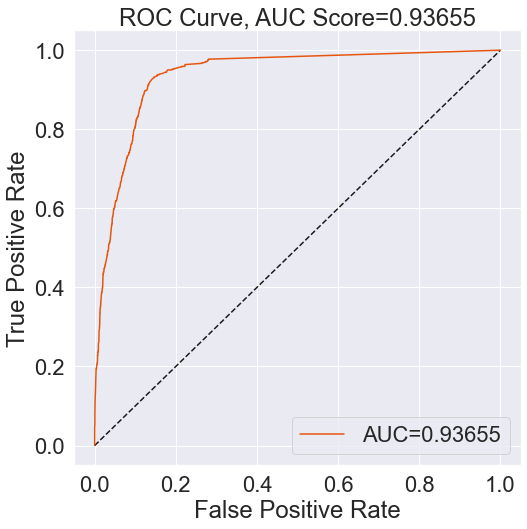

In [34]:
rclf = RandomForestClassifier(n_estimators=100, random_state=1, n_jobs=-1)
model_res = rclf.fit(X_train, y_train)
roc_auc_rnf = model_pred(model_res, X_test, y_test, predict_prob=True)


In [35]:
# from sklearn.tree import export_graphviz
#
# estimator = model_res.estimators_[1]
# export_graphviz(estimator, out_file='../output/WnvTree.dot',
#                 feature_names = X_train.columns,
#                 max_depth=4,
#                 rounded = True, proportion = False,
#                 precision = 2, filled = True)
#
# # Convert to png using system command (requires Graphviz)
# from subprocess import call
# call(['dot', '-Tpng', '../output/WnvTree.dot', '-o', '../output/WnvTree.png', '-Gdpi=600'])
#
# # Display in jupyter notebook
# from IPython.display import Image
# Image(filename = '../output/WnvTree.png')

log loss =  0.1576248878279598


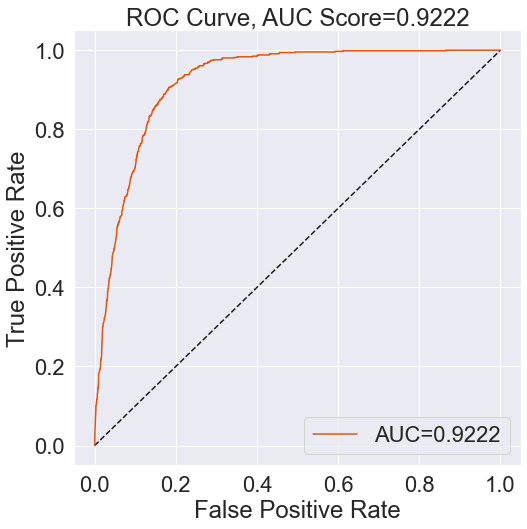

In [36]:
#XGBOOST
# Instantiate model with 100 decision trees
clv = XGBClassifier(n_estimators = 100)
# Train the model on training data
xgb = clv.fit(X_train, y_train)
roc_auc_xgb = model_pred(xgb, X_test, y_test, predict_prob=True )

In [37]:
print ("ROC Curve of all the models:")
# Log loss
print ("Log Loss Curve for Random Forest: ", roc_auc_rnf[0])
print ("Log Loss for XGB boost: ", roc_auc_xgb[0])
# ROC Score
print ("ROC Curve for Random Forest: ", roc_auc_rnf[1])
print ("ROC Curve for XGB boost: ", roc_auc_xgb[1])


ROC Curve of all the models:
Log Loss Curve for Random Forest:  0.1844805152407691
Log Loss for XGB boost:  0.1576248878279598
ROC Curve for Random Forest:  0.93655
ROC Curve for XGB boost:  0.9222


 99%|===================| 22148/22316 [00:54<00:00]        

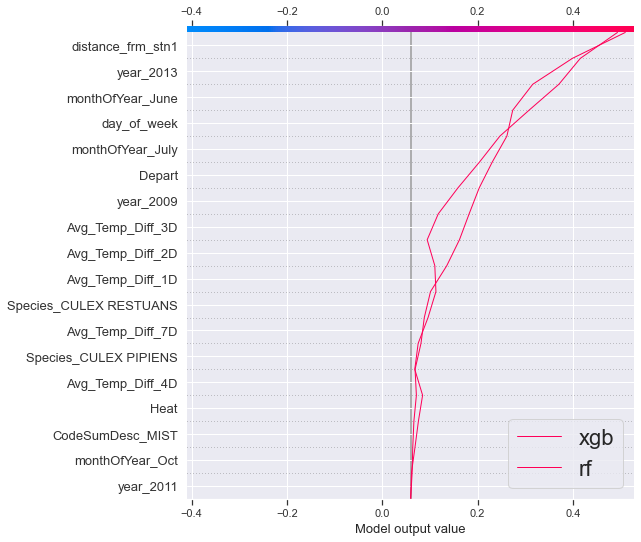

In [52]:
import shap

# Random Forest Explainer
rf_explainer = shap.TreeExplainer(model_res, X_train, model_output="probability", feature_perturbation="interventional")
rf_values = rf_explainer.shap_values(X_train)
rf_probs = roc_auc_rnf[2]

# XGBoost Explainer
xgb_explainer = shap.TreeExplainer(xgb, X_train, model_output="probability", feature_perturbation="interventional")
xgb_values = xgb_explainer.shap_values(X_train)
xgb_probs = roc_auc_xgb[2]

# List of Model expaliner.
base_values = [xgb_explainer.expected_value, rf_explainer.expected_value[1]]
shap_values = [xgb_values, rf_values[1]]
predictions = [xgb_probs,rf_probs]

# labels
labels = ["xgb", "rf", "gbt"]

idx=200

shap.multioutput_decision_plot(base_values, shap_values, idx, feature_names=X_train.columns.to_list(),legend_labels=labels, legend_location='lower right')

#### Observation:

The ROC Score for RandomForestClassifier is higher than the other classifier.
The precision_recall_curve for the RandomForestClassifier is better than then other classifier.

Since the ratio between virus present in our dataset to virus absent is huge, we will follow Precesion Recall Curve for the RandomForestClassifier to handle the imbalance in our dataset.

In [39]:
param_grid = {
    'n_estimators': [3, 5, 10,20,40,60,80,100],
    'max_features': ['auto', 'sqrt'],
    'max_depth' : [4,6,8],
    'criterion' :['gini', 'entropy']
}

In [40]:
clf = RandomForestClassifier()
rf_grid_cv = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5)
rf_grid_cv.fit(X_train, y_train)
print (rf_grid_cv.best_params_)

{'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 10}


log loss =  0.19926950223885384
[0.07944513 0.01108069 0.06321048 ... 0.01710512 0.12632867 0.08362389]


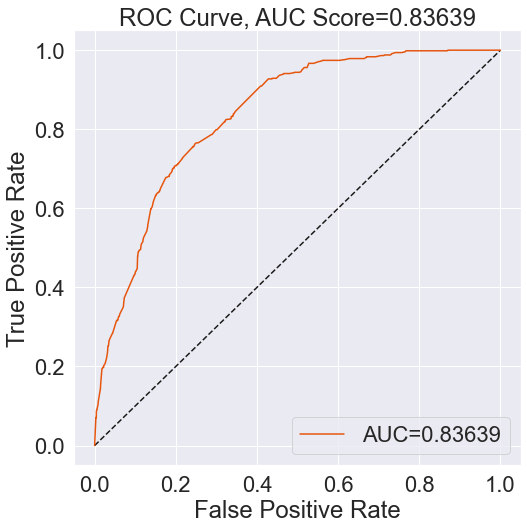

In [41]:
clf = RandomForestClassifier(n_estimators=3, random_state=1, criterion='gini',max_depth=8, max_features='sqrt')
rfc = clf.fit(X_train, y_train)
roc_auc_gbc = model_pred(rfc, X_test, y_test,predict_prob=True )
print (roc_auc_gbc[2])

In [43]:
import shap
explainer = shap.TreeExplainer(rfc, data=X_train, model_output="probability",feature_perturbation="interventional")

100%|===================| 44483/44632 [03:24<00:00]        

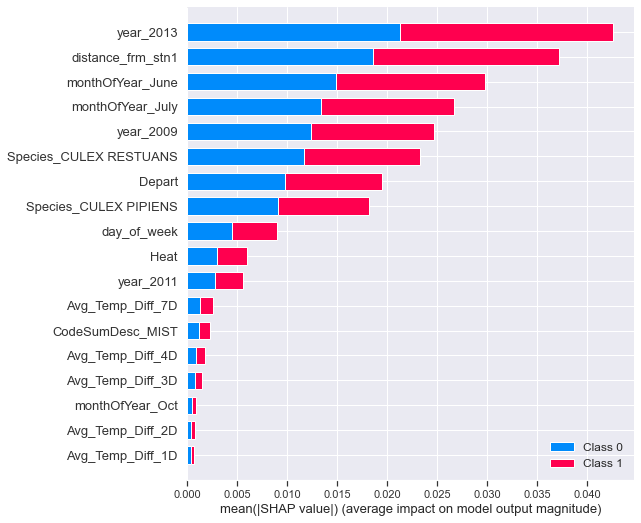

In [72]:
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, X_train)

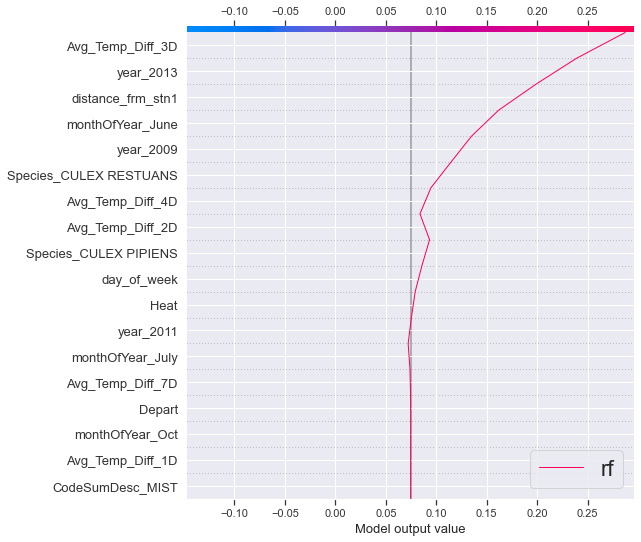

In [51]:
# Random Forest Explainer
rf_explainer = shap.TreeExplainer(rfc, X_train, model_output="probability", feature_perturbation="interventional")
rf_values = rf_explainer.shap_values(X_train)
rf_probs = roc_auc_rnf[2]

# List of Model expaliner.
base_values = [rf_explainer.expected_value[1]]
shap_values = [rf_values[1]]
predictions = [rf_probs]

# labels
labels = ["rf"]

idx=200

shap.multioutput_decision_plot(base_values, shap_values, idx, feature_names=X_train.columns.to_list(),legend_labels=labels, legend_location='lower right')

### Data Modelling with balanced dataset.

In [60]:
virus_present = train_df[train_df["WnvPresent"]==1]
virus_absent = train_df[train_df["WnvPresent"]==0]
sample = virus_absent.sample(n=virus_present.shape[0])
print ("shape virus absent: ", virus_absent.shape, "shape virus present", virus_present.shape)
balanced_df = pd.concat([virus_present ,sample] )
print ("shape virus absent: ", virus_absent.shape, "shape virus present", virus_present.shape, "balanced df shape:", balanced_df.shape)

shape virus absent:  (29637, 62) shape virus present (2243, 62)
shape virus absent:  (29637, 62) shape virus present (2243, 62) balanced df shape: (4486, 62)


In [ ]:
X = balanced_df.drop(columns=["WnvPresent"], axis=1)
y = balanced_df.WnvPresent

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [62]:
final_iv, IV = data_vars(X_train, y_train)
final_iv

Station
Latitude
0   -0.222482
1    0.189799
dtype: float64
Longitude
0    0.346288
1   -0.213457
2   -0.237145
dtype: float64
distance_frm_stn1
0    0.188094
1   -0.225569
dtype: float64
distance_frm_stn2
0   -0.318383
1   -0.087042
2    0.165701
3    0.265881
dtype: float64
closest_station
NumMosquitos
0   -1.938266
1   -0.911041
2    0.108811
3    1.011941
dtype: float64
month
0   -0.019272
1    0.074021
dtype: float64
week
0   -1.392448
1    0.187375
2    0.589855
dtype: float64
day_of_week
0    0.108585
1   -0.221486
dtype: float64
day_of_month
0   -0.056391
1    0.065139
dtype: float64
Tmax
0   -0.126124
1   -0.124164
2    0.236083
dtype: float64
Tmin
0   -0.156853
1    0.151715
dtype: float64
Tavg
0   -0.316679
1    0.141645
2    0.182501
dtype: float64
Depart
0   -0.444503
1    0.073675
2    0.305847
dtype: float64
DewPoint
0   -0.771682
1    0.078191
2    0.153277
3    0.388689
dtype: float64
WetBulb
0   -0.332193
1    0.277984
dtype: float64
Relative_humidity
0   -0.204446
1 

divide by zero encountered in log


VAR_NAME  MIN_VALUE  MAX_VALUE  COUNT  EVENT  EVENT_RATE  \
0            Station   1.000000   1.000000   9666    859    0.088868   
1            Station   2.000000   2.000000  12650    723    0.057154   
2           Latitude  41.644612  41.899230  11257    648    0.057564   
3           Latitude  41.903002  42.017430  11059    934    0.084456   
4          Longitude -87.930995 -87.794896   7528    733    0.097370   
..               ...        ...        ...    ...    ...         ...   
130  monthOfYear_May   1.000000   1.000000    103      0    0.000000   
131  monthOfYear_Oct   0.000000   0.000000  21857   1577    0.072151   
132  monthOfYear_Oct   1.000000   1.000000    459      5    0.010893   
133  monthOfYear_Sep   0.000000   0.000000  18310   1248    0.068159   
134  monthOfYear_Sep   1.000000   1.000000   4006    334    0.083375   

     NONEVENT  NON_EVENT_RATE  DIST_EVENT  DIST_NON_EVENT       WOE        IV  
0        8807        0.911132    0.542984        0.424761  0.245552  0.056229  
1       11927        0.942846    0.457016        0.575239 -0.230066  0.056229  
2       10609        0.942436    0.409608        0.511672 -0.222482  0.042079  
3       10125        0.915544    0.590392        0.488328  0.189799  0.042079  
4        6795        0.902630    0.463338        0.327723  0.346288  0.077601  
..        ...             ...         ...             ...       ...       ...  
130       103        1.000000    0.000000        0.004968  0.000000  0.000025  
131     20280        0.927849    0.996839        0.978104  0.018974  0.036620  
132       454        0.989107    0.003161        0.021896 -1.935574  0.036620  
133     17062        0.931841    0.788875        0.822900 -0.042227  0.007416  
134      3672        0.916625    0.211125        0.177100  0.175734  0.007416  

[135 rows x 12 columns]

In [64]:
features = list(IV[(IV['IV'] >= 0.01) & (IV['IV'] <= 0.8)]['VAR_NAME'])
X2 = X_train[features]
display(X2.shape)
X2.head()

X1A = X2._get_numeric_data()
final_dfA, final_vifA = iterate_vif(X1A)

(22316, 37)

Iteration # 1


divide by zero encountered in double_scalars


Removing Station with VIF of inf
Iteration # 2
Removing monthly_#days_per_codesum with VIF of inf
Iteration # 3
Removing Tavg with VIF of 86450698.155201
Iteration # 4
Removing Longitude with VIF of 741311.099045
Iteration # 5
Removing Latitude with VIF of 188018.919294
Iteration # 6
Removing StnPressure with VIF of 54639.936871
Iteration # 7
Removing DewPoint with VIF of 38870.776894
Iteration # 8
Removing WetBulb with VIF of 11658.448625
Iteration # 9
Removing Tmin with VIF of 640.710842
Iteration # 10
Removing Tmax with VIF of 452.312935
Iteration # 11
Removing week with VIF of 107.969796
Iteration # 12
Removing closest_station with VIF of 48.501376
Iteration # 13
Removing Relative_humidity with VIF of 26.254026
Iteration # 14
Removing Cool with VIF of 19.339312
Iteration # 15
Removing Avg_Temp_Diff_6D with VIF of 9.713745
Iteration # 16
Removing distance_frm_stn2 with VIF of 7.562330
Iteration # 17
Removing Avg_Temp_Diff_5D with VIF of 6.745927
Iteration # 18
Removing weekly_#days_

In [65]:
X_train=final_dfA
display(len(X_train.columns))
display(X_train.columns)
X_train.head()

18

Index(['Avg_Temp_Diff_1D', 'Avg_Temp_Diff_2D', 'Avg_Temp_Diff_3D',
       'Avg_Temp_Diff_4D', 'Avg_Temp_Diff_7D', 'CodeSumDesc_MIST', 'Depart',
       'Heat', 'Species_CULEX PIPIENS', 'Species_CULEX RESTUANS',
       'day_of_week', 'distance_frm_stn1', 'monthOfYear_July',
       'monthOfYear_June', 'monthOfYear_Oct', 'year_2009', 'year_2011',
       'year_2013'],
      dtype='object')

Avg_Temp_Diff_1D  Avg_Temp_Diff_2D  Avg_Temp_Diff_3D  Avg_Temp_Diff_4D  \
3460                0.0               0.0               0.0               0.0   
16415               0.0               0.0               0.0               0.0   
10084               0.0               0.0               0.0               0.0   
28863               0.0               0.0               0.0               0.0   
27699               0.0               0.0               0.0               0.0   

       Avg_Temp_Diff_7D  CodeSumDesc_MIST  Depart  Heat  \
3460                0.0                 0       8     0   
16415               0.0                 0      -2     0   
10084              -3.0                 0      10     0   
28863              -1.0                 0      -7     0   
27699               0.0                 0      -2     0   

       Species_CULEX PIPIENS  Species_CULEX RESTUANS  day_of_week  \
3460                       1                       0            3   
16415                      0                       0            3   
10084                      1                       0            3   
28863                      0                       0            3   
27699                      0                       0            3   

       distance_frm_stn1  monthOfYear_July  monthOfYear_June  monthOfYear_Oct  \
3460               25.79                 0                 0                0   
16415              20.24                 0                 0                0   
10084              10.64                 0                 0                1   
28863               2.59                 0                 0                0   
27699               2.59                 0                 0                0   

       year_2009  year_2011  year_2013  
3460           0          0          0  
16415          1          0          0  
10084          0          0          0  
28863          0          0          1  
27699          0          0          1

In [66]:
X_test=X_test[X_train.columns]
X_test.head()

Avg_Temp_Diff_1D  Avg_Temp_Diff_2D  Avg_Temp_Diff_3D  Avg_Temp_Diff_4D  \
6256                0.0               0.0               0.0               0.0   
15373               0.0               0.0               0.0               0.0   
1992                0.0               0.0               0.0               0.0   
19577               0.0               0.0               0.0               0.0   
17687               0.0               0.0               0.0               0.0   

       Avg_Temp_Diff_7D  CodeSumDesc_MIST  Depart  Heat  \
6256                0.0                 0       4     0   
15373               0.0                 0      -4     0   
1992                0.0                 0       8     0   
19577               0.0                 0       5     0   
17687               0.0                 0      -7     5   

       Species_CULEX PIPIENS  Species_CULEX RESTUANS  day_of_week  \
6256                       1                       0            2   
15373                      0                       0            4   
1992                       0                       0            2   
19577                      0                       1            4   
17687                      0                       1            4   

       distance_frm_stn1  monthOfYear_July  monthOfYear_June  monthOfYear_Oct  \
6256               15.85                 0                 0                0   
15373              19.96                 0                 0                0   
1992                8.04                 0                 0                0   
19577               2.59                 1                 0                0   
17687               2.59                 0                 1                0   

       year_2009  year_2011  year_2013  
6256           0          0          0  
15373          1          0          0  
1992           0          0          0  
19577          0          1          0  
17687          0          1          0

In [67]:
clf = RandomForestClassifier()
rf_grid_cv = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5)
rf_grid_cv.fit(X_train, y_train)
print(rf_grid_cv.best_params_)

{'criterion': 'gini', 'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 80}


log loss =  0.19240388078562037
[0.10866676 0.01102645 0.12077921 ... 0.00919717 0.1014476  0.07140383]


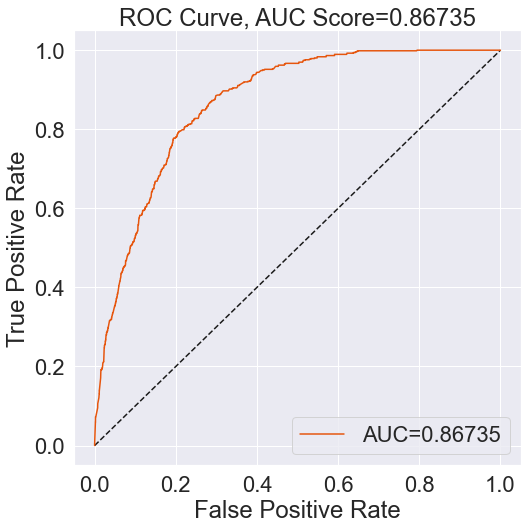

In [68]:
clf = RandomForestClassifier(n_estimators=80, random_state=1, criterion='gini', max_depth=8, max_features='sqrt')
rfc = clf.fit(X_train, y_train)
roc_auc_gbc = model_pred(rfc, X_test, y_test, predict_prob=True)
print(roc_auc_gbc[2])

100%|===================| 44424/44632 [03:13<00:00]        

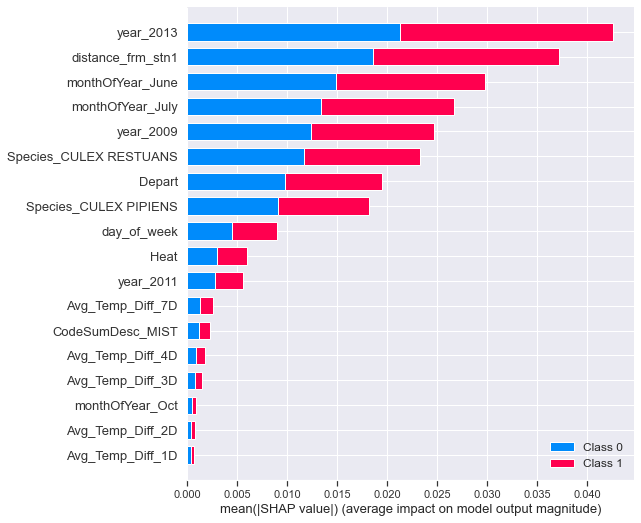

In [69]:
explainer = shap.TreeExplainer(rfc, data=X_train, model_output="probability", feature_perturbation="interventional")
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type="bar")